<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Time Series: Data Manipulation
              
</p>
</div>

Data Science Cohort Live NYC Nov 2022
<p>Phase 4: Topic 34</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
energy_data = pd.read_csv('data/energydata_complete.csv', parse_dates = True, index_col = 'date')

#  Objectives
- Understand the use case for time series data
- Manipulate datetime objects
- Understand different resampling techniques
- Visualization for time series data

Time series:

- set of data as a function of / indexed by time

Energy expenditure and sensor monitoring for a household:

<img src = "Images/householdenergy.jpg">

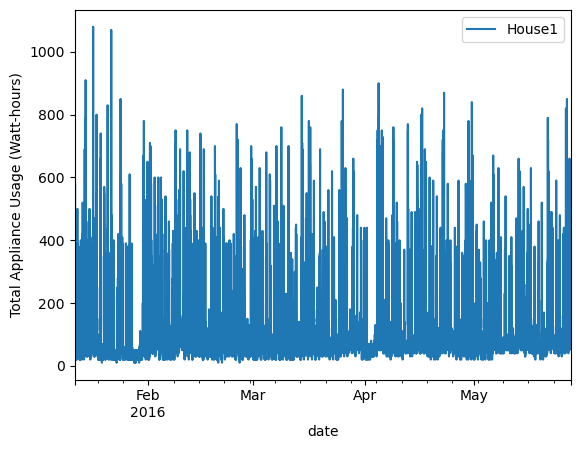

In [2]:
fig, ax = plt.subplots()
energy_data.plot(y = 'Appliances', ax = ax, label = 'House1')
ax.set_ylabel('Total Appliance Usage (Watt-hours)')
plt.show()

**Time series forecasting** 

Energy usage forecasting in aggregate and across sets of devices:

*Projected energy usage for next month?*

- consumer end: smart house optimization
- business end: how many power plants should be open / capacity?

**Time series classification**

- Based on EEG voltage data: seizure or eye-lid opening?
- Use temporal features and past-future dependencies for trace class recognition

<img src = "images/x4.png" >

We'll be focusing in next series of lectures on univariate time series forecasting:
- given a time series of a single quantity
- predict future values of quantity as function of time

But there are many, many other types of tasks involving time-series data:

- real-time state prediction
- machine signal encoding-decoding
- etc.

Before any modeling:
- need to understand how to manipulate Python datastructures involving time series
- common and important time series data manipulation operations

Time series have a notion of ordering:
- past comes before future
- indexing reflects this temporal ordering

Need special kind of indexing and data type to deal with this:

- datetime objects
- pandas DateTimeIndex

Special methods associated with these.

Let's have a closer look at the house energy usage dataset:

In [3]:
energy_data_df = pd.read_csv('data/energy_expenditure.csv', index_col=[0])

In [4]:
energy_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19735 entries, 0 to 19734
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        19735 non-null  object
 1   Appliances  19735 non-null  int64 
 2   lights      19735 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 616.7+ KB


Time series data:
- appliance energy usage
- light energy usage

A look at the dataframe:

In [5]:
energy_data_df.head()

,date,Appliances,lights
0,2016-01-11 17:00:00,60,30
1,2016-01-11 17:10:00,60,30
2,2016-01-11 17:20:00,50,30
3,2016-01-11 17:30:00,50,40
4,2016-01-11 17:40:00,60,40


The date column is a string

In [6]:
print(type(energy_data_df.loc[0, 'date']))
energy_data_df.loc[0, 'date']

<class 'str'>


'2016-01-11 17:00:00'

Incovenient for many reasons:
- No implicit understanding of the different components of string 
- No notion of date/time ordering understood between the strings

**Want to convert column to column of datetime objects**

#### Converting column to datetime:
- pd.to_datetime()

In [7]:
energy_data_df['date']

0        2016-01-11 17:00:00
1        2016-01-11 17:10:00
2        2016-01-11 17:20:00
3        2016-01-11 17:30:00
4        2016-01-11 17:40:00
                ...         
19730    2016-05-27 17:20:00
19731    2016-05-27 17:30:00
19732    2016-05-27 17:40:00
19733    2016-05-27 17:50:00
19734    2016-05-27 18:00:00
Name: date, Length: 19735, dtype: object

In [8]:
date_asdt = pd.to_datetime(energy_data_df['date'])
date_asdt

0       2016-01-11 17:00:00
1       2016-01-11 17:10:00
2       2016-01-11 17:20:00
3       2016-01-11 17:30:00
4       2016-01-11 17:40:00
                ...        
19730   2016-05-27 17:20:00
19731   2016-05-27 17:30:00
19732   2016-05-27 17:40:00
19733   2016-05-27 17:50:00
19734   2016-05-27 18:00:00
Name: date, Length: 19735, dtype: datetime64[ns]

Intelligently parses string and returns a pandas datetime column
- works for many common string representations of date times

Looking at a single element:

In [9]:
datetime0 = date_asdt[0]
datetime0

Timestamp('2016-01-11 17:00:00')

Timestamp object attributes for extracting parts of datetime:

In [10]:
print(datetime0.year)
print(datetime0.month)
print(datetime0.day)

2016
1
11


Extracting other components:
- .hour
- .minute
- .second

Can go all the way to nanoseconds if you like

Some nifty methods:

In [11]:
datetime0.day_name() # get the name of the day of the week

'Monday'

In [12]:
datetime0.month_name() # get the name of the day of the week

'January'

#### Time-zone awareness
- .tz attribute
- .tz_localize

- pandas TimeStamp() objects can be made timezone aware
- this functionality useful when comparing time series data:
    - taken contemporaneously across different locations

Right now, not time-zone aware:
- House is in Belgium

In [13]:
dt0_timeaware = datetime0.tz_localize('Europe/Brussels')
dt0_timeaware

Timestamp('2016-01-11 17:00:00+0100', tz='Europe/Brussels')

Getting a list of useful timezone strings:

In [81]:
from pytz import common_timezones
for zone in common_timezones:
    print(zone)

Africa/Abidjan
Africa/Accra
Africa/Addis_Ababa
Africa/Algiers
Africa/Asmara
Africa/Bamako
Africa/Bangui
Africa/Banjul
Africa/Bissau
Africa/Blantyre
Africa/Brazzaville
Africa/Bujumbura
Africa/Cairo
Africa/Casablanca
Africa/Ceuta
Africa/Conakry
Africa/Dakar
Africa/Dar_es_Salaam
Africa/Djibouti
Africa/Douala
Africa/El_Aaiun
Africa/Freetown
Africa/Gaborone
Africa/Harare
Africa/Johannesburg
Africa/Juba
Africa/Kampala
Africa/Khartoum
Africa/Kigali
Africa/Kinshasa
Africa/Lagos
Africa/Libreville
Africa/Lome
Africa/Luanda
Africa/Lubumbashi
Africa/Lusaka
Africa/Malabo
Africa/Maputo
Africa/Maseru
Africa/Mbabane
Africa/Mogadishu
Africa/Monrovia
Africa/Nairobi
Africa/Ndjamena
Africa/Niamey
Africa/Nouakchott
Africa/Ouagadougou
Africa/Porto-Novo
Africa/Sao_Tome
Africa/Tripoli
Africa/Tunis
Africa/Windhoek
America/Adak
America/Anchorage
America/Anguilla
America/Antigua
America/Araguaina
America/Argentina/Buenos_Aires
America/Argentina/Catamarca
America/Argentina/Cordoba
America/Argentina/Jujuy
America/

We can immediately take our datetime and convert to:
- US/Eastern time

In [15]:
dt0_timeaware

Timestamp('2016-01-11 17:00:00+0100', tz='Europe/Brussels')

In [16]:
dt0_timeaware.tz_convert('US/Eastern')

Timestamp('2016-01-11 11:00:00-0500', tz='US/Eastern')

Calculating the time difference between the two occupancy loggings:

In [17]:
date_asdt

0       2016-01-11 17:00:00
1       2016-01-11 17:10:00
2       2016-01-11 17:20:00
3       2016-01-11 17:30:00
4       2016-01-11 17:40:00
                ...        
19730   2016-05-27 17:20:00
19731   2016-05-27 17:30:00
19732   2016-05-27 17:40:00
19733   2016-05-27 17:50:00
19734   2016-05-27 18:00:00
Name: date, Length: 19735, dtype: datetime64[ns]

In [18]:
time_diff = date_asdt[19730] - date_asdt[0]
time_diff

Timedelta('137 days 00:20:00')

Outputs a TimeDelta object:
- encodes time difference in useful representation

#### Useful Timedelta methods/attributes

Getting components in time day/hour/minutes/seconds/... representation

In [19]:
time_diff.components


Components(days=137, hours=0, minutes=20, seconds=0, milliseconds=0, microseconds=0, nanoseconds=0)

In [20]:
time_diff.components.minutes

20

May be useful to convert to difference in units of seconds or milliseconds:

In [21]:
print(time_diff.days)
print(time_diff.total_seconds())

137
11838000.0


Nano seconds:

In [22]:
# time difference in nanoseconds
time_diff.value

11838000000000000

#### Vectorized datetime operations in Pandas Series

All operations used on pandas TimeStamps: can be vectorized on pandas datetime Series
- Series.dt.attribute
- Series.dt.method()


In [23]:
date_asdt

0       2016-01-11 17:00:00
1       2016-01-11 17:10:00
2       2016-01-11 17:20:00
3       2016-01-11 17:30:00
4       2016-01-11 17:40:00
                ...        
19730   2016-05-27 17:20:00
19731   2016-05-27 17:30:00
19732   2016-05-27 17:40:00
19733   2016-05-27 17:50:00
19734   2016-05-27 18:00:00
Name: date, Length: 19735, dtype: datetime64[ns]

In [24]:
date_asdt.dt.year

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
19730    2016
19731    2016
19732    2016
19733    2016
19734    2016
Name: date, Length: 19735, dtype: int64

In [25]:
date_asdt.dt.month

0        1
1        1
2        1
3        1
4        1
        ..
19730    5
19731    5
19732    5
19733    5
19734    5
Name: date, Length: 19735, dtype: int64

In [26]:
date_asdt.dt.day

0        11
1        11
2        11
3        11
4        11
         ..
19730    27
19731    27
19732    27
19733    27
19734    27
Name: date, Length: 19735, dtype: int64

#### Setting datetime columns as index of Series/DataFrame

First check the data type:

In [27]:
energy_data_df.date

0        2016-01-11 17:00:00
1        2016-01-11 17:10:00
2        2016-01-11 17:20:00
3        2016-01-11 17:30:00
4        2016-01-11 17:40:00
                ...         
19730    2016-05-27 17:20:00
19731    2016-05-27 17:30:00
19732    2016-05-27 17:40:00
19733    2016-05-27 17:50:00
19734    2016-05-27 18:00:00
Name: date, Length: 19735, dtype: object

In [28]:
energy_data_df.date = pd.to_datetime(
    energy_data_df.date)
energy_data_df.date

0       2016-01-11 17:00:00
1       2016-01-11 17:10:00
2       2016-01-11 17:20:00
3       2016-01-11 17:30:00
4       2016-01-11 17:40:00
                ...        
19730   2016-05-27 17:20:00
19731   2016-05-27 17:30:00
19732   2016-05-27 17:40:00
19733   2016-05-27 17:50:00
19734   2016-05-27 18:00:00
Name: date, Length: 19735, dtype: datetime64[ns]

Setting the index

In [29]:
energy_data = energy_data_df.set_index('date')
energy_data.head()

,Appliances,lights
date,,
2016-01-11 17:00:00,60,30
2016-01-11 17:10:00,60,30
2016-01-11 17:20:00,50,30
2016-01-11 17:30:00,50,40
2016-01-11 17:40:00,60,40


Checking index type

In [30]:
energy_data.index

DatetimeIndex(['2016-01-11 17:00:00', '2016-01-11 17:10:00',
               '2016-01-11 17:20:00', '2016-01-11 17:30:00',
               '2016-01-11 17:40:00', '2016-01-11 17:50:00',
               '2016-01-11 18:00:00', '2016-01-11 18:10:00',
               '2016-01-11 18:20:00', '2016-01-11 18:30:00',
               ...
               '2016-05-27 16:30:00', '2016-05-27 16:40:00',
               '2016-05-27 16:50:00', '2016-05-27 17:00:00',
               '2016-05-27 17:10:00', '2016-05-27 17:20:00',
               '2016-05-27 17:30:00', '2016-05-27 17:40:00',
               '2016-05-27 17:50:00', '2016-05-27 18:00:00'],
              dtype='datetime64[ns]', name='date', length=19735, freq=None)

Selecting the column, yields a series:
- indexed by time

In [31]:
appliance_series = energy_data['Appliances']
appliance_series

date
2016-01-11 17:00:00     60
2016-01-11 17:10:00     60
2016-01-11 17:20:00     50
2016-01-11 17:30:00     50
2016-01-11 17:40:00     60
                      ... 
2016-05-27 17:20:00    100
2016-05-27 17:30:00     90
2016-05-27 17:40:00    270
2016-05-27 17:50:00    420
2016-05-27 18:00:00    430
Name: Appliances, Length: 19735, dtype: int64

We can do some nifty things now.

#### DataFrame selection via datetime index

Getting all timestamps on a given day

In [32]:
appliance_series.loc['2016-03-04']

date
2016-03-04 00:00:00    60
2016-03-04 00:10:00    50
2016-03-04 00:20:00    40
2016-03-04 00:30:00    40
2016-03-04 00:40:00    60
                       ..
2016-03-04 23:10:00    40
2016-03-04 23:20:00    50
2016-03-04 23:30:00    40
2016-03-04 23:40:00    50
2016-03-04 23:50:00    40
Name: Appliances, Length: 144, dtype: int64

Using partial string addressing:
- Get all times on this day from 8-9 AM    

In [33]:
appliance_series.loc['2016-03-04 08']

date
2016-03-04 08:00:00    80
2016-03-04 08:10:00    50
2016-03-04 08:20:00    50
2016-03-04 08:30:00    50
2016-03-04 08:40:00    50
2016-03-04 08:50:00    40
Name: Appliances, dtype: int64

Getting all timestamps for a given month: April

In [34]:
appliance_series.loc['2016-04']

date
2016-04-01 00:00:00    60
2016-04-01 00:10:00    60
2016-04-01 00:20:00    60
2016-04-01 00:30:00    50
2016-04-01 00:40:00    50
                       ..
2016-04-30 23:10:00    40
2016-04-30 23:20:00    20
2016-04-30 23:30:00    40
2016-04-30 23:40:00    30
2016-04-30 23:50:00    70
Name: Appliances, Length: 4320, dtype: int64

Same idea with partial string selection

Recognizes named strings as well:

In [35]:
appliance_series.loc['April 2016']

date
2016-04-01 00:00:00    60
2016-04-01 00:10:00    60
2016-04-01 00:20:00    60
2016-04-01 00:30:00    50
2016-04-01 00:40:00    50
                       ..
2016-04-30 23:10:00    40
2016-04-30 23:20:00    20
2016-04-30 23:30:00    40
2016-04-30 23:40:00    30
2016-04-30 23:50:00    70
Name: Appliances, Length: 4320, dtype: int64

In [36]:
appliance_series.loc['April 3, 2016']

date
2016-04-03 00:00:00    60
2016-04-03 00:10:00    60
2016-04-03 00:20:00    50
2016-04-03 00:30:00    60
2016-04-03 00:40:00    50
                       ..
2016-04-03 23:10:00    70
2016-04-03 23:20:00    70
2016-04-03 23:30:00    60
2016-04-03 23:40:00    60
2016-04-03 23:50:00    60
Name: Appliances, Length: 144, dtype: int64

**Slicing pandas Dataframes and Series using datetime ranges**

- The datetime index allows for slicing dataframes and Series in datetime ranges

In [37]:
appliance_series.loc['2016-4-04':'2016-4-08' ]

date
2016-04-04 00:00:00    50
2016-04-04 00:10:00    60
2016-04-04 00:20:00    50
2016-04-04 00:30:00    70
2016-04-04 00:40:00    70
                       ..
2016-04-08 23:10:00    40
2016-04-08 23:20:00    40
2016-04-08 23:30:00    50
2016-04-08 23:40:00    40
2016-04-08 23:50:00    50
Name: Appliances, Length: 720, dtype: int64

Partial slicing:
    
- Can slice on different time scales:
    - e.g., slicing between years
    - slicing between months, etc

In [38]:
#getting appliance energy usage for january and february
janfeb_appliance = appliance_series.loc['2016-1': '2016-2']
janfeb_appliance

date
2016-01-11 17:00:00    60
2016-01-11 17:10:00    60
2016-01-11 17:20:00    50
2016-01-11 17:30:00    50
2016-01-11 17:40:00    60
                       ..
2016-02-29 23:10:00    60
2016-02-29 23:20:00    40
2016-02-29 23:30:00    40
2016-02-29 23:40:00    40
2016-02-29 23:50:00    40
Name: Appliances, Length: 7098, dtype: int64

We may want to make our date-time index, time-zone aware:
- first access the DateTimeIndex (a Series)
- use vectorized datetime method .tz_localize()

In [39]:
janfeb_appliance = janfeb_appliance.tz_localize('Europe/Brussels')

In [40]:
janfeb_appliance

date
2016-01-11 17:00:00+01:00    60
2016-01-11 17:10:00+01:00    60
2016-01-11 17:20:00+01:00    50
2016-01-11 17:30:00+01:00    50
2016-01-11 17:40:00+01:00    60
                             ..
2016-02-29 23:10:00+01:00    60
2016-02-29 23:20:00+01:00    40
2016-02-29 23:30:00+01:00    40
2016-02-29 23:40:00+01:00    40
2016-02-29 23:50:00+01:00    40
Name: Appliances, Length: 7098, dtype: int64

In [41]:
janfeb_appliance.index

DatetimeIndex(['2016-01-11 17:00:00+01:00', '2016-01-11 17:10:00+01:00',
               '2016-01-11 17:20:00+01:00', '2016-01-11 17:30:00+01:00',
               '2016-01-11 17:40:00+01:00', '2016-01-11 17:50:00+01:00',
               '2016-01-11 18:00:00+01:00', '2016-01-11 18:10:00+01:00',
               '2016-01-11 18:20:00+01:00', '2016-01-11 18:30:00+01:00',
               ...
               '2016-02-29 22:20:00+01:00', '2016-02-29 22:30:00+01:00',
               '2016-02-29 22:40:00+01:00', '2016-02-29 22:50:00+01:00',
               '2016-02-29 23:00:00+01:00', '2016-02-29 23:10:00+01:00',
               '2016-02-29 23:20:00+01:00', '2016-02-29 23:30:00+01:00',
               '2016-02-29 23:40:00+01:00', '2016-02-29 23:50:00+01:00'],
              dtype='datetime64[ns, Europe/Brussels]', name='date', length=7098, freq=None)

Your name is Adeel, a data analyst working for a tech/ customer service contractor in Bangalore, India. 

- The smart utility company in Brussels has outsourced certain data tasks as well as customer service issues to your company. 
- Need data for Jan/Feb reindexed in Bangalore time to join with customer service database from your call center.

In [42]:
# time in India based on pytz timezones
janfeb_appliance.tz_convert('Asia/Kolkata')

date
2016-01-11 21:30:00+05:30    60
2016-01-11 21:40:00+05:30    60
2016-01-11 21:50:00+05:30    50
2016-01-11 22:00:00+05:30    50
2016-01-11 22:10:00+05:30    60
                             ..
2016-03-01 03:40:00+05:30    60
2016-03-01 03:50:00+05:30    40
2016-03-01 04:00:00+05:30    40
2016-03-01 04:10:00+05:30    40
2016-03-01 04:20:00+05:30    40
Name: Appliances, Length: 7098, dtype: int64

In [43]:
# time in Brussels
janfeb_appliance

date
2016-01-11 17:00:00+01:00    60
2016-01-11 17:10:00+01:00    60
2016-01-11 17:20:00+01:00    50
2016-01-11 17:30:00+01:00    50
2016-01-11 17:40:00+01:00    60
                             ..
2016-02-29 23:10:00+01:00    60
2016-02-29 23:20:00+01:00    40
2016-02-29 23:30:00+01:00    40
2016-02-29 23:40:00+01:00    40
2016-02-29 23:50:00+01:00    40
Name: Appliances, Length: 7098, dtype: int64

Plotting the time series

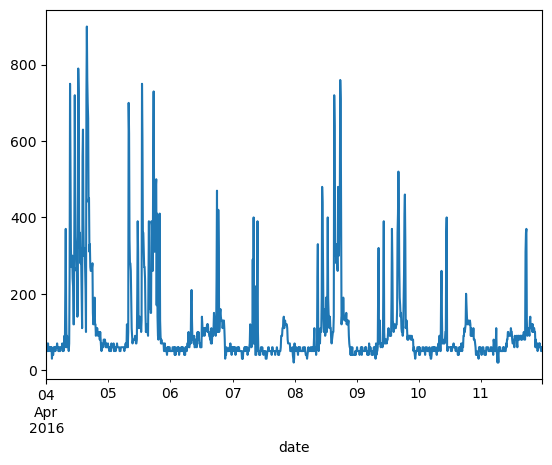

In [97]:
data_subset = appliance_series.loc['2016-4-04':'2016-4-11']
data_subset.plot(y = 'Occupancy')
plt.show()

There is a lot of data here:
- Frequency of sampling: every 10 minutes.
- Maybe for a specific task: need points only every hour

- E.g., another time series only has hourly samples. Want to compare time series.
- Too much data: hard to store and already have enough data when sampled every hour.

#### Resampling 

> **Resampling** allows us to convert the time series into a particular frequency

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling

**To upsample** is to increase the frequency of the data of interest.  
**To downsample** is to decrease the frequency of the data of interest.


**Down-sampling**

- series and dateframes indexed by datetime can be resampled
- .resample(): takes in string argument for sampling frequency

- '1H': every 1 hour samples
- '2H': every 2 hours, etc
- 'T': minute frequency
- 'S' : second frequency
- 'D': daily
- 'W': weekly
- 'M': monthly

For more frequencies:

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [110]:
# hourly samples: downsamping from every 10 minutes
data_subset.resample('30T')

Creates a resampler object:
- with downsampling need to aggregate
- aggregates on data points within one hour interval

Aggregating with mean via chaining:

In [99]:
# time series of hourly mean of appliance usage
data_subset_downsamp = \
data_subset.resample('1H').mean()

The usual aggregation functions are available:
- exactly same as with groupby
- .mean(), .std(), .median(). etc
- .agg(func) for customized aggregation

Comparing the downsampled and original data

In [102]:
data_subset_downsamp

date
2016-04-04 00:00:00     58.333333
2016-04-04 01:00:00     56.666667
2016-04-04 02:00:00     46.666667
2016-04-04 03:00:00     56.666667
2016-04-04 04:00:00     58.333333
                          ...    
2016-04-11 19:00:00    121.666667
2016-04-11 20:00:00    106.666667
2016-04-11 21:00:00     73.333333
2016-04-11 22:00:00     61.666667
2016-04-11 23:00:00     55.000000
Freq: H, Name: Appliances, Length: 192, dtype: float64

In [103]:
data_subset

date
2016-04-04 00:00:00    50
2016-04-04 00:10:00    60
2016-04-04 00:20:00    50
2016-04-04 00:30:00    70
2016-04-04 00:40:00    70
                       ..
2016-04-11 23:10:00    60
2016-04-11 23:20:00    50
2016-04-11 23:30:00    60
2016-04-11 23:40:00    50
2016-04-11 23:50:00    50
Name: Appliances, Length: 1152, dtype: int64

Plotting the data of the downsampled data vs. actual data:

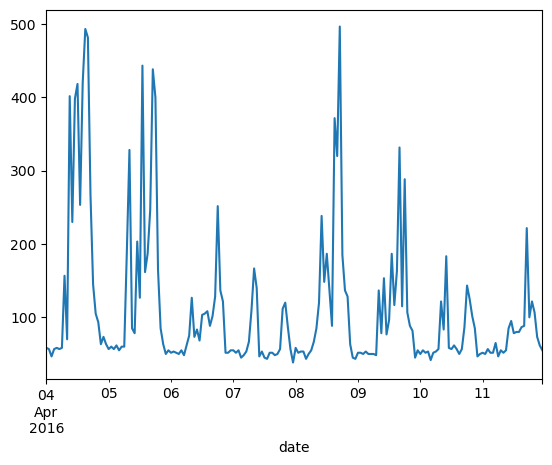

In [104]:
# down sampled data
data_subset_downsamp.plot()
plt.show()

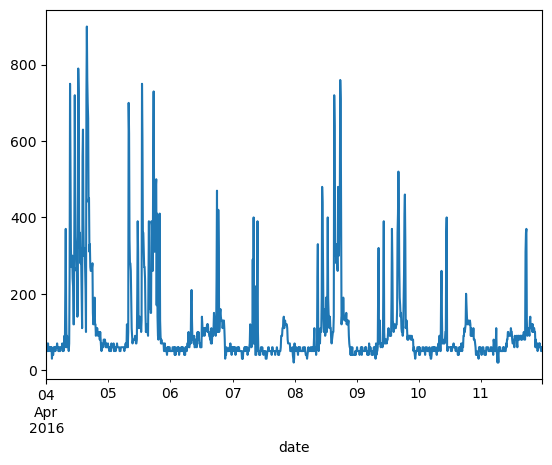

In [105]:
# original data
data_subset.plot()
plt.show()

Reproduces many of the longer term features:
- averages out finer spiking as a function of time

Be careful when downsampling:
- aggregating can throw out useful information
- but maybe fine for your use case

**Upsampling**

We may want to know local weather conditions:
- local airport has windspeed and temperature data
- merge it with energy usage data

In [106]:
weather_df = pd.read_csv('data/weather.csv')
weather_df.head()

weather_df.date = pd.to_datetime(weather_df.date)
weather_df.head()

,date,Windspeed,T_out
0,2016-01-11 17:00:00,6.666667,6.483333
1,2016-01-11 17:30:00,5.666667,6.133333
2,2016-01-11 18:00:00,5.166667,5.916667
3,2016-01-11 18:30:00,5.666667,5.966667
4,2016-01-11 19:00:00,6.000000,6.000000


Problem: 
- Weather sampled every 30 minutes. 
- Energy usage data is sampled every 10 mins.

In [107]:
energy_data_df

,date,Appliances,lights
0,2016-01-11 17:00:00,60,30
1,2016-01-11 17:10:00,60,30
2,2016-01-11 17:20:00,50,30
3,2016-01-11 17:30:00,50,40
4,2016-01-11 17:40:00,60,40
...,...,...,...
19730,2016-05-27 17:20:00,100,0
19731,2016-05-27 17:30:00,90,0
19732,2016-05-27 17:40:00,270,10
19733,2016-05-27 17:50:00,420,10


#### Ordered Merges

First step is to merge the dataset:
- merge two dataframes on a date-time ordered column
- preserving order of observations

Can't do a standard merge:
- need ordered merge

pandas.merge_ordered(left, right, on=None, left_on=None, right_on=None, left_by=None, how='outer')

In [108]:
# columns in each dataframe that are merged on must be ordered
# datetime automatically satisfies this
combined_data = pd.merge_ordered(energy_data_df, weather_df, on = 'date', how = 'outer') # usually will use outer join
combined_data.set_index('date', inplace = True)
combined_data.head()

,Appliances,lights,Windspeed,T_out
date,,,,
2016-01-11 17:00:00,60,30,6.666667,6.483333
2016-01-11 17:10:00,60,30,NaN,NaN
2016-01-11 17:20:00,50,30,NaN,NaN
2016-01-11 17:30:00,50,40,5.666667,6.133333
2016-01-11 17:40:00,60,40,NaN,NaN


Can downsample energy usage data to 30 min intervals: 
- but may actually want this data at 10 min intervals.


Can **upsample** weather data to 10 min frequency:
- if between every 30 min, expect time series behaves relatively smoothly

Let's upsample by filling in NaN values. Sequential data has multiple relevant imputation methods:
- .ffill() 
- .bfill()
- .interpolate()

- Fill series forward from last non-NaN value.
- Fill series backwards from last non-NaN value in reverse direction.
- Linear (by default) interpolation between non-NaNs

**.ffill()**

Forward fills NaNs from last non-empty value

In [54]:
combined_data

,Appliances,lights,Windspeed,T_out
date,,,,
2016-01-11 17:00:00,60,30,6.666667,6.483333
2016-01-11 17:10:00,60,30,NaN,NaN
2016-01-11 17:20:00,50,30,NaN,NaN
2016-01-11 17:30:00,50,40,5.666667,6.133333
2016-01-11 17:40:00,60,40,NaN,NaN
...,...,...,...,...
2016-05-27 17:20:00,100,0,NaN,NaN
2016-05-27 17:30:00,90,0,3.666667,22.466667
2016-05-27 17:40:00,270,10,NaN,NaN


In [55]:
ff = combined_data.ffill()
ff

,Appliances,lights,Windspeed,T_out
date,,,,
2016-01-11 17:00:00,60,30,6.666667,6.483333
2016-01-11 17:10:00,60,30,6.666667,6.483333
2016-01-11 17:20:00,50,30,6.666667,6.483333
2016-01-11 17:30:00,50,40,5.666667,6.133333
2016-01-11 17:40:00,60,40,5.666667,6.133333
...,...,...,...,...
2016-05-27 17:20:00,100,0,3.166667,22.866667
2016-05-27 17:30:00,90,0,3.666667,22.466667
2016-05-27 17:40:00,270,10,3.666667,22.466667


**.bfill()**

Backwards fills from first value non-empty after a sequence of NaNs

In [56]:
combined_data

,Appliances,lights,Windspeed,T_out
date,,,,
2016-01-11 17:00:00,60,30,6.666667,6.483333
2016-01-11 17:10:00,60,30,NaN,NaN
2016-01-11 17:20:00,50,30,NaN,NaN
2016-01-11 17:30:00,50,40,5.666667,6.133333
2016-01-11 17:40:00,60,40,NaN,NaN
...,...,...,...,...
2016-05-27 17:20:00,100,0,NaN,NaN
2016-05-27 17:30:00,90,0,3.666667,22.466667
2016-05-27 17:40:00,270,10,NaN,NaN


In [57]:
combined_data.bfill()

,Appliances,lights,Windspeed,T_out
date,,,,
2016-01-11 17:00:00,60,30,6.666667,6.483333
2016-01-11 17:10:00,60,30,5.666667,6.133333
2016-01-11 17:20:00,50,30,5.666667,6.133333
2016-01-11 17:30:00,50,40,5.666667,6.133333
2016-01-11 17:40:00,60,40,5.166667,5.916667
...,...,...,...,...
2016-05-27 17:20:00,100,0,3.666667,22.466667
2016-05-27 17:30:00,90,0,3.666667,22.466667
2016-05-27 17:40:00,270,10,4.000000,22.200000


**.interpolate(method= '...')**
- interpolates NaNs between two values
- can use various specified strategies 

method

- 'linear' (default)
- 'spline' 
- etc.

In [58]:
combined_data

,Appliances,lights,Windspeed,T_out
date,,,,
2016-01-11 17:00:00,60,30,6.666667,6.483333
2016-01-11 17:10:00,60,30,NaN,NaN
2016-01-11 17:20:00,50,30,NaN,NaN
2016-01-11 17:30:00,50,40,5.666667,6.133333
2016-01-11 17:40:00,60,40,NaN,NaN
...,...,...,...,...
2016-05-27 17:20:00,100,0,NaN,NaN
2016-05-27 17:30:00,90,0,3.666667,22.466667
2016-05-27 17:40:00,270,10,NaN,NaN


In [59]:
combined_data.interpolate()

,Appliances,lights,Windspeed,T_out
date,,,,
2016-01-11 17:00:00,60,30,6.666667,6.483333
2016-01-11 17:10:00,60,30,6.333333,6.366667
2016-01-11 17:20:00,50,30,6.000000,6.250000
2016-01-11 17:30:00,50,40,5.666667,6.133333
2016-01-11 17:40:00,60,40,5.500000,6.061111
...,...,...,...,...
2016-05-27 17:20:00,100,0,3.500000,22.600000
2016-05-27 17:30:00,90,0,3.666667,22.466667
2016-05-27 17:40:00,270,10,3.777778,22.377778


Used ordered merge and imputation to upsample less frequent columns:

Can also upsample columns/series in a different way:
- using the resampler object

Take original weather data:

In [60]:
weather_df['date'] = pd.to_datetime(
    weather_df['date'])
weather_df_ind = weather_df.set_index('date')
weather_df_ind.head()

,Windspeed,T_out
date,,
2016-01-11 17:00:00,6.666667,6.483333
2016-01-11 17:30:00,5.666667,6.133333
2016-01-11 18:00:00,5.166667,5.916667
2016-01-11 18:30:00,5.666667,5.966667
2016-01-11 19:00:00,6.000000,6.000000


Construct resampler object at 10 minute interval:

In [118]:
upsamp = weather_df_ind.resample('10T')
upsamp

.asfreq() can return original timeseries values at new sampling frequency

In [120]:
upsamp.asfreq()

,Windspeed,T_out
date,,
2016-01-11 17:00:00,6.666667,6.483333
2016-01-11 17:10:00,NaN,NaN
2016-01-11 17:20:00,NaN,NaN
2016-01-11 17:30:00,5.666667,6.133333
2016-01-11 17:40:00,NaN,NaN
...,...,...
2016-05-27 17:20:00,NaN,NaN
2016-05-27 17:30:00,3.666667,22.466667
2016-05-27 17:40:00,NaN,NaN


The data has NaNs where there are no samples at this frequency. Need to impute these.

Resampler object has same fill / imputation methods as dataframe to do this.

- .ffill()
- .bfill()
- .interpolate()

In [63]:
upsamp.ffill()

,Windspeed,T_out
date,,
2016-01-11 17:00:00,6.666667,6.483333
2016-01-11 17:10:00,6.666667,6.483333
2016-01-11 17:20:00,6.666667,6.483333
2016-01-11 17:30:00,5.666667,6.133333
2016-01-11 17:40:00,5.666667,6.133333
...,...,...
2016-05-27 17:20:00,3.166667,22.866667
2016-05-27 17:30:00,3.666667,22.466667
2016-05-27 17:40:00,3.666667,22.466667


In [64]:
upsamp.asfreq()

,Windspeed,T_out
date,,
2016-01-11 17:00:00,6.666667,6.483333
2016-01-11 17:10:00,NaN,NaN
2016-01-11 17:20:00,NaN,NaN
2016-01-11 17:30:00,5.666667,6.133333
2016-01-11 17:40:00,NaN,NaN
...,...,...
2016-05-27 17:20:00,NaN,NaN
2016-05-27 17:30:00,3.666667,22.466667
2016-05-27 17:40:00,NaN,NaN


In [65]:
upsamp.bfill()

,Windspeed,T_out
date,,
2016-01-11 17:00:00,6.666667,6.483333
2016-01-11 17:10:00,5.666667,6.133333
2016-01-11 17:20:00,5.666667,6.133333
2016-01-11 17:30:00,5.666667,6.133333
2016-01-11 17:40:00,5.166667,5.916667
...,...,...
2016-05-27 17:20:00,3.666667,22.466667
2016-05-27 17:30:00,3.666667,22.466667
2016-05-27 17:40:00,4.000000,22.200000


In [66]:
upsamp.asfreq()

,Windspeed,T_out
date,,
2016-01-11 17:00:00,6.666667,6.483333
2016-01-11 17:10:00,NaN,NaN
2016-01-11 17:20:00,NaN,NaN
2016-01-11 17:30:00,5.666667,6.133333
2016-01-11 17:40:00,NaN,NaN
...,...,...
2016-05-27 17:20:00,NaN,NaN
2016-05-27 17:30:00,3.666667,22.466667
2016-05-27 17:40:00,NaN,NaN


In [67]:
upsamp.interpolate()

,Windspeed,T_out
date,,
2016-01-11 17:00:00,6.666667,6.483333
2016-01-11 17:10:00,6.333333,6.366667
2016-01-11 17:20:00,6.000000,6.250000
2016-01-11 17:30:00,5.666667,6.133333
2016-01-11 17:40:00,5.500000,6.061111
...,...,...
2016-05-27 17:20:00,3.500000,22.600000
2016-05-27 17:30:00,3.666667,22.466667
2016-05-27 17:40:00,3.777778,22.377778


In [68]:
upsamp.asfreq()

,Windspeed,T_out
date,,
2016-01-11 17:00:00,6.666667,6.483333
2016-01-11 17:10:00,NaN,NaN
2016-01-11 17:20:00,NaN,NaN
2016-01-11 17:30:00,5.666667,6.133333
2016-01-11 17:40:00,NaN,NaN
...,...,...
2016-05-27 17:20:00,NaN,NaN
2016-05-27 17:30:00,3.666667,22.466667
2016-05-27 17:40:00,NaN,NaN


- subset upsampled and interpolated data for April 4 to 11
- join with our energy data for these data

In [69]:
data_joined = upsamp.interpolate().loc['April 4 2016': 'April 11 2016']
data_joined['Appliances']= data_subset
data_joined.head()

,Windspeed,T_out,Appliances
date,,,
2016-04-04 00:00:00,5.000000,14.966667,50
2016-04-04 00:10:00,5.000000,14.933333,60
2016-04-04 00:20:00,5.000000,14.900000,50
2016-04-04 00:30:00,5.000000,14.866667,70
2016-04-04 00:40:00,4.888889,14.777778,70


In [70]:
data_joined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1152 entries, 2016-04-04 00:00:00 to 2016-04-11 23:50:00
Freq: 10T
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Windspeed   1152 non-null   float64
 1   T_out       1152 non-null   float64
 2   Appliances  1152 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 36.0 KB


Oversampled less frequent weather data and joined with more frequent energy usage measuremts.

#### Time Series Visualization

Loading pandas dataframe with datetime index:
- column 0 is the date
- parse_date = True interprets index as datetime index automatically.

In [130]:
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
from matplotlib.animation import FuncAnimation, HTMLWriter, PillowWriter
from IPython.display import HTML

In [222]:
# column 0 is the date the parse_date = True interprets index as datetime index automatically.
uber_data = pd.read_csv("Data/uber.csv", index_col = [0], parse_dates = True)
uber_data = uber_data.resample('1M').mean()



In [223]:
uber_scaled = StandardScaler().fit_transform(uber_data)
uber_df = pd.DataFrame(uber_scaled)
uber_df.head()

,0,1,2,3,4,5
0,0.066326,0.080594,0.050503,0.077441,0.077441,1.181747
1,0.393428,0.388799,0.409842,0.401179,0.401179,-1.258076
2,0.431956,0.383438,0.456920,0.404428,0.404428,-1.804934
3,-0.414626,-0.438022,-0.428343,-0.453222,-0.453222,-1.250426
4,-0.837753,-0.855525,-0.835117,-0.855725,-0.855725,-1.640813


(35,) Open (35,)
(35,) High (35,)
(35,) Low (35,)
(35,) Close (35,)
(35,) Adj Close (35,)
(35,) Volume (35,)


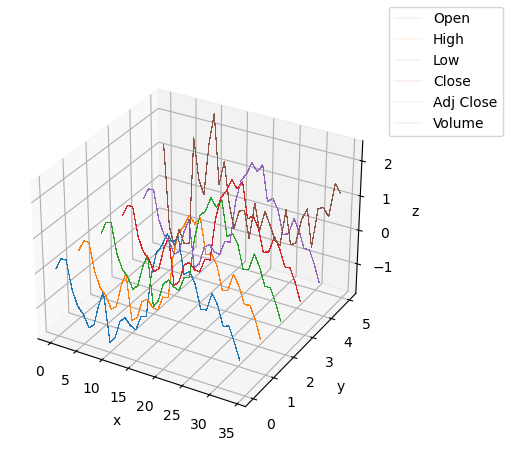

In [250]:
fig = plt.figure(figsize=plt.figaspect(.75))
ax = fig.add_subplot(1, 1, 1, projection='3d')

for ind, col in enumerate(uber_data.columns):
    
    x = uber_df.index
    y = col
    z = uber_df[ind].values
#     x, y = np.meshgrid(x, y)
    print(x.shape, y, z.shape)    
    ax.plot(x, z, zs=ind, zdir='y', linewidth=.1, antialiased=False, label=col)

ax.set(
        xlabel='x',
        ylabel='y',
        zlabel='z'
        )
fig.legend()
plt.show()


[-7.5 -6.5]
(2, 35) (2, 35) (1, 35)
[-6. -5.]
(2, 35) (2, 35) (1, 35)
[-4.5 -3.5]
(2, 35) (2, 35) (1, 35)
[-3. -2.]
(2, 35) (2, 35) (1, 35)
[-1.5 -0.5]
(2, 35) (2, 35) (1, 35)
[0. 1.]
(2, 35) (2, 35) (1, 35)


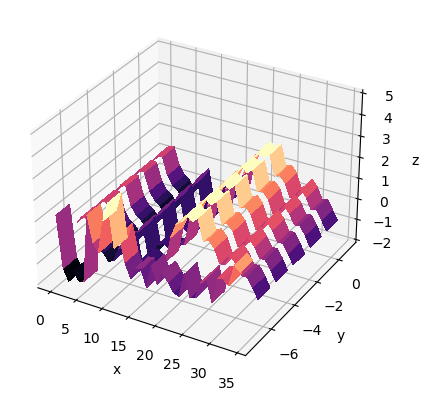

In [289]:
fig = plt.figure(figsize=plt.figaspect(.75))
ax = fig.add_subplot(1, 1, 1, projection='3d')

for ind in range(-5, 1):
    space = ind *1.5
    ind = ind * -1
    x = uber_df.index
    y = np.arange(0, 2) + space
    print(y)
    z = uber_df[ind].values.reshape(1, 35)
    x, y = np.meshgrid(x, y)
    print(x.shape, y.shape, z.shape)    
    ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.magma,
                    linewidth=1, antialiased=False)

ax.set(
        xlabel='x',
        ylabel='y',
        zlabel='z',
        zlim=[-2, 5]
        )
plt.show()

Multiple time series indexed on same datetime:
- pandas plotting useful
- subplots = True option 

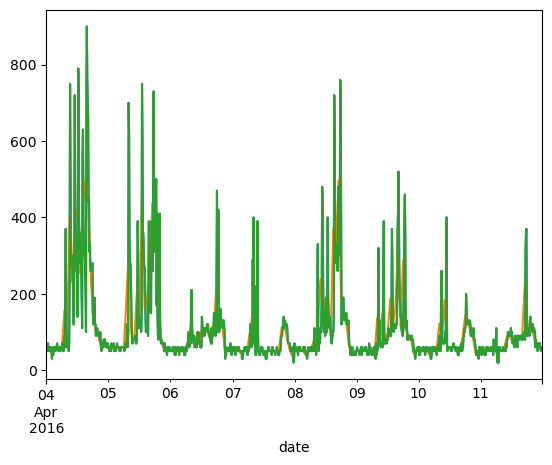

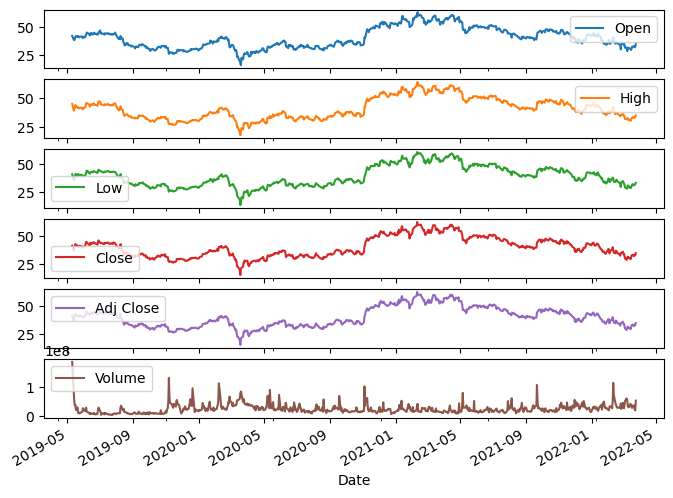

In [72]:
uber_data.plot(subplots = True, figsize = (8,6))
plt.show()

#### Time Series Differencing and Trend Computation

In many applications:
- don't care *as much* about actual values of time series
- care *more* about changes in values of time series
- or relative changes in values of time series

- Time series differencing
- Evaluating change in percentage from previous value

**Differencing**
- pandas Series has .diff() method
- .diff(period = ) where period indicates differencing lag

- period = 1: return Series $Y[t] - Y[t - 1]$
- period = 2: returns Series $Y[t] - Y[t-2]$
- period = k: returns Series $Y[t] - Y[t-k]$

Let's first order difference the adjusted close Series and compare to original series.

In [73]:
uber_data['Adj Close'].diff() # default is first order difference

Date
2019-05-10         NaN
2019-05-13   -4.470002
2019-05-14    2.860001
2019-05-15    1.330002
2019-05-16    1.709999
                ...   
2022-03-18    0.510003
2022-03-21   -1.380001
2022-03-22    1.369998
2022-03-23   -0.289997
2022-03-24    1.640000
Name: Adj Close, Length: 725, dtype: float64

In [74]:
uber_data['Adj Close']

Date
2019-05-10    41.570000
2019-05-13    37.099998
2019-05-14    39.959999
2019-05-15    41.290001
2019-05-16    43.000000
                ...    
2022-03-18    33.360001
2022-03-21    31.980000
2022-03-22    33.349998
2022-03-23    33.060001
2022-03-24    34.700001
Name: Adj Close, Length: 725, dtype: float64

Naturally produces NaN at first element: no previous element to difference on.

Plot visualizing the Adjusted close and the differenced Adjusted Close:

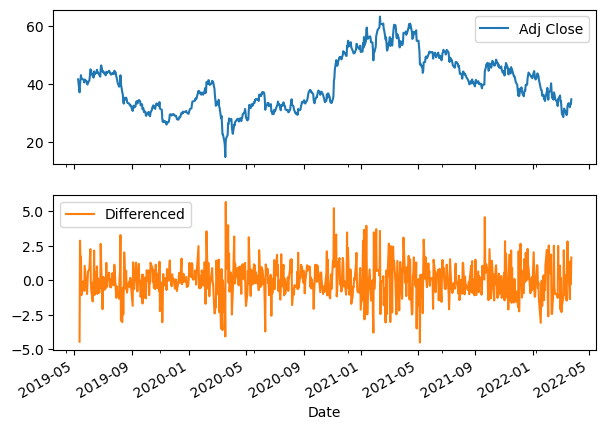

In [75]:
diff_df = pd.DataFrame(uber_data['Adj Close'])
diff_df['Differenced'] = uber_data['Adj Close'].diff()
diff_df.plot(subplots = True, figsize = (7,5))
plt.show()

With stocks, in particular:
- want to predict where percentage change between subsequent time-steps might be large

- pandas Series has .pct_change() calculating:
$$ \frac{Y[t] - Y[t-1]}{Y[t]} $$

In [76]:
diff_df['pct_change'] = diff_df['Adj Close'].pct_change()*100
diff_df['pct_change'] 

Date
2019-05-10          NaN
2019-05-13   -10.752952
2019-05-14     7.708898
2019-05-15     3.328333
2019-05-16     4.141436
                ...    
2022-03-18     1.552521
2022-03-21    -4.136694
2022-03-22     4.283921
2022-03-23    -0.869556
2022-03-24     4.960677
Name: pct_change, Length: 725, dtype: float64

Visualizing original time series, differenced series, sequential percentage change:

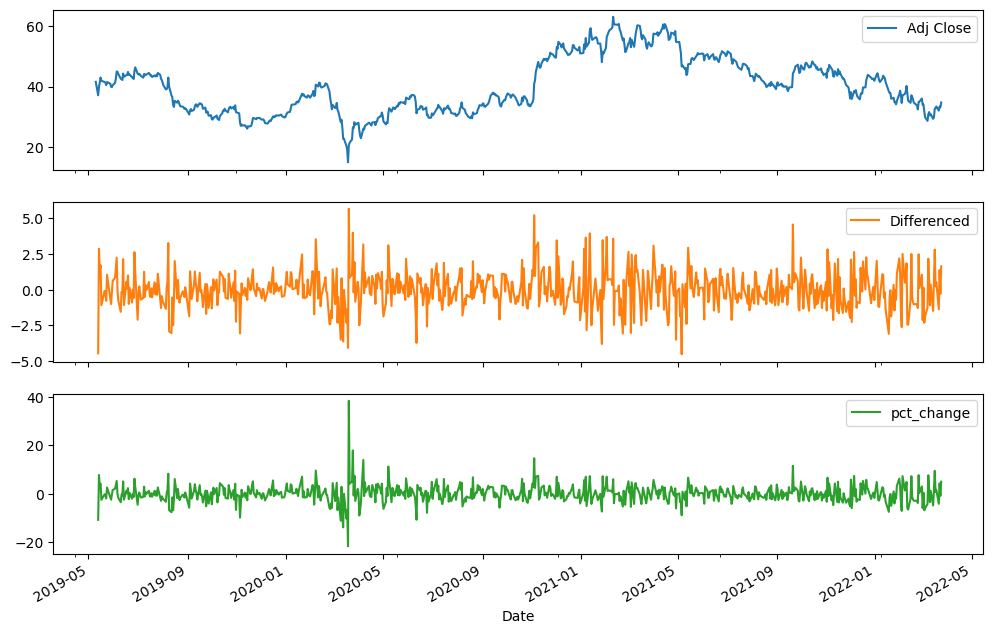

In [77]:
diff_df.plot(subplots = True, figsize = (12,8))
plt.show()

In some cases, want to smooth a time series:
- can be helpful in evaluating time series trends
- around which there are noise fluctuations

.rolling() method:
- creates an object which creates window that slides across time series
- can aggregate within window

Generates a rolling aggregation (rolling mean, etc) as a function of time.

- .rolling(n) generates a rolling object that contains a sequence of windows:
    - each window has $n$ observations in it

In [78]:
diff_df['Adj Close'].rolling(8)

Rolling [window=8,center=False,axis=0]

Aggregating will compute statistic in window
- sliding window through time series

In [79]:
# note that first four rollng means will be NaN
# makes sense for n = 5 window
diff_df['Adj Close'].rolling(8).mean()

Date
2019-05-10         NaN
2019-05-13         NaN
2019-05-14         NaN
2019-05-15         NaN
2019-05-16         NaN
                ...   
2022-03-18    31.32000
2022-03-21    31.38000
2022-03-22    31.74750
2022-03-23    32.03500
2022-03-24    32.71375
Name: Adj Close, Length: 725, dtype: float64

Plot the rolling mean and  the actual series:

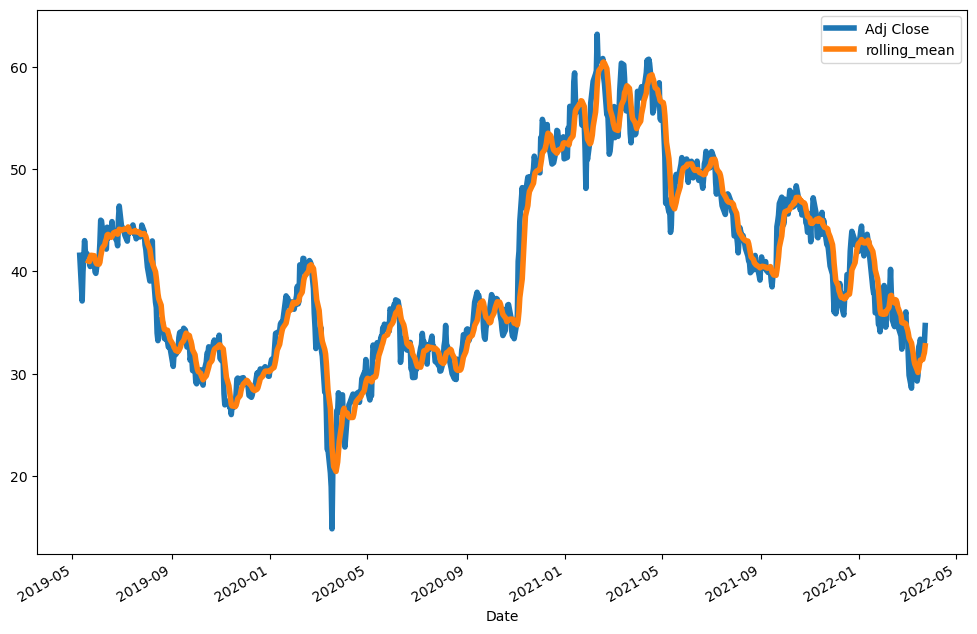

In [80]:
diff_df['rolling_mean'] = diff_df['Adj Close'].rolling(8).mean()
diff_df[['Adj Close', 'rolling_mean']].plot(figsize = (12,8), linewidth = 4)
plt.show()

Gives us a smoothed version of the Close prices:
- analyze sustained increasing and decreasing trends
- discarding/ignoring high frequency fluctuation/noise

We/you will use many of these Time Series methods:
- datetime manipulation
- resampling/imputation techniques
- windowed aggregates
- differencing

For:
- exploring time series processes and their internal structure
- modeling the process that generated the series:
    - trend, seasonality, statistics of fluctuations
- constructing parsimonious models for out-of-sample predictions/forecasting
